<a href="https://colab.research.google.com/github/Wardmisp/IBM-Coursera-Data-Science-Capstone/blob/master/IBM_Capstone_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM Capstone

## Exploration

### Explore

Here we will be using this kaggle dataset [https://www.kaggle.com/noulam/tomato]. The dataset contains images of sick tomatoes' leaf. These images are ordered in folders named after the disease of the plant.

First, we have to load these data and extract/discover it.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
from PIL import Image
import numpy as np



In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rmimialonevan","key":"894aef01c5bda437dea7cb3203dc8b6b"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d noulam/tomato

 98% 727M/743M [00:06<00:00, 102MB/s]
100% 743M/743M [00:06<00:00, 118MB/s]


In [ ]:
!mkdir dataset
!unzip tomato.zip -d dataset

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: dataset/new plant disease

The dataset contains one more folder than needed, we are deleting for clarity purpose

In [ ]:
!rm -rf dataset/new\ plant\ diseases\ dataset\(augmented\)

Now we can explore our dataset. Lets display random images from differents folder.

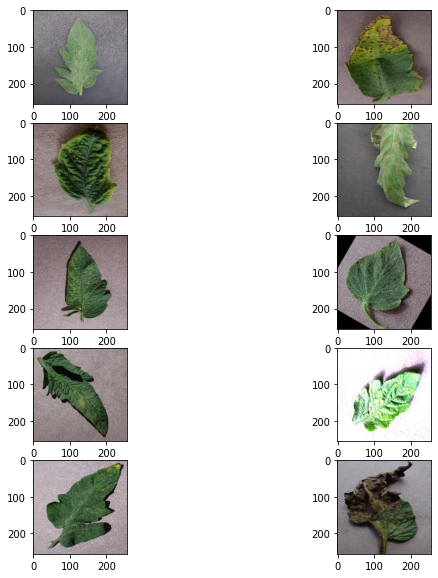

In [ ]:
liste_maladie = os.listdir('/content/dataset/New Plant Diseases Dataset(Augmented)/train')

def plot_camera(folders):

  rows = 5
  columns = 2
  fig=plt.figure(figsize=(10, 10))

  for i,folder in enumerate(folders):
    path = random.choice(os.listdir(f"/content/dataset/New Plant Diseases Dataset(Augmented)/train/{folder}"))
    img = mpimg.imread(f"/content/dataset/New Plant Diseases Dataset(Augmented)/train/{folder}/{path}")
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

  plt.show()

plot_camera(liste_maladie)

In [ ]:
x = []
x_tilde = []
y = [i for i in range(len(liste_maladie))]
for i,folder in enumerate(liste_maladie):
  length = len(os.listdir(f"/content/dataset/New Plant Diseases Dataset(Augmented)/train/{folder}"))
  x.append(length)

for i,folder in enumerate(liste_maladie):
  length = len(os.listdir(f"/content/dataset/New Plant Diseases Dataset(Augmented)/valid/{folder}"))
  x_tilde.append(length)

We can compare distribution from images. Here blue represent training set while orange is testing set

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


<BarContainer object of 10 artists>

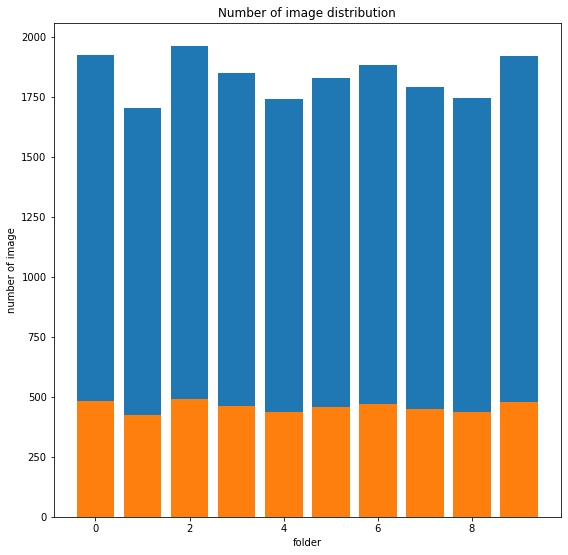

In [ ]:
n_bins = 20
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(2,2,1)
plt.bar(y, height=x)
plt.xlabel('folder')
plt.ylabel('number of image')
plt.title('Number of image distribution')

fig.add_subplot(2,2,1)
plt.bar(y, height=x_tilde)

We can also check the dimensions of the images present in the dataset

In [ ]:
size_dict = {}
for i,folder in enumerate(liste_maladie):
  for j, img in enumerate(os.listdir(f"/content/dataset/New Plant Diseases Dataset(Augmented)/train/{folder}")):
    size = Image.open(f"/content/dataset/New Plant Diseases Dataset(Augmented)/train/{folder}/{img}").size
    if size in size_dict:
      size_dict[size] += 1
    else:
      size_dict[size] = 0
size_dict

{(256, 256): 18344}

All images have the same dimensions (256,256)

We can also compare the distribution from colors in each class. 

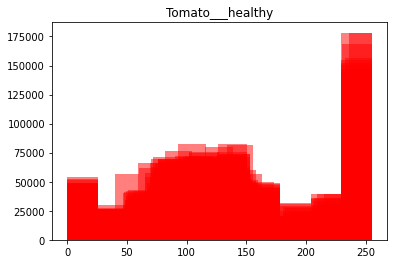

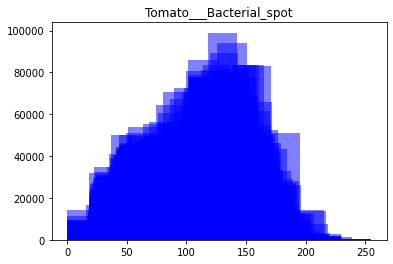

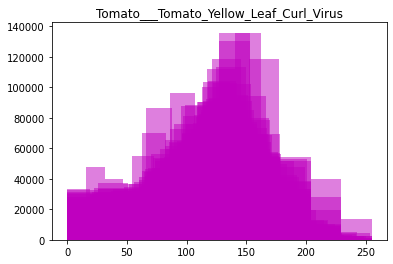

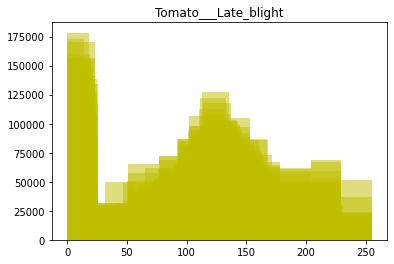

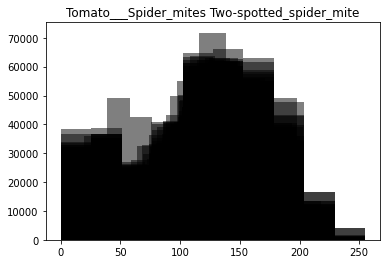

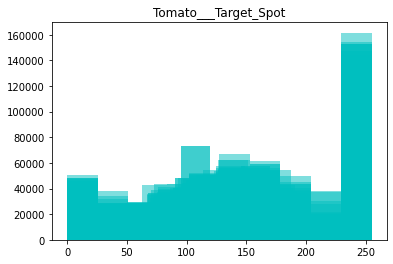

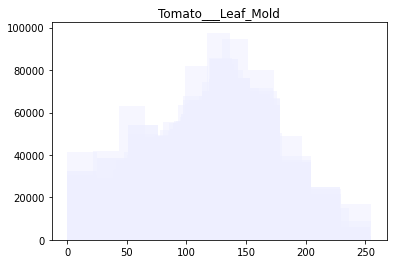

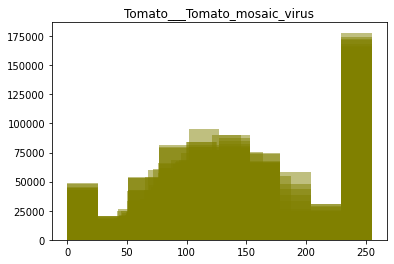

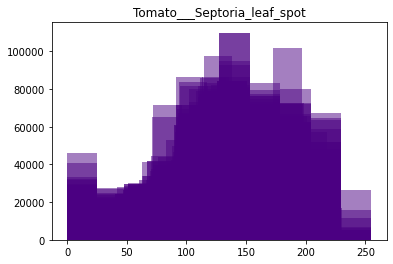

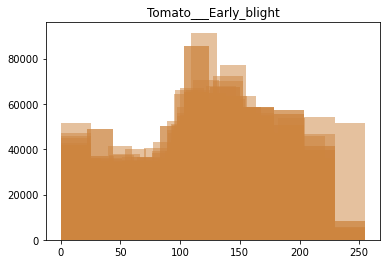

In [ ]:
colors=["r","b","m","y","k","c","#eeefff","#808000","#4B0082","#CD853F"]
for i,folder in enumerate(liste_maladie):
  k = 0
  for j, img in enumerate(os.listdir(f"/content/dataset/New Plant Diseases Dataset(Augmented)/train/{folder}")):
    k += 1
    img=mpimg.imread(f"/content/dataset/New Plant Diseases Dataset(Augmented)/train/{folder}/{img}")
    arr = np.uint8(img)
    arr = arr.flatten()
    plt.hist(arr,color=colors[i],alpha=0.5)
    if(k>500): #We are taking first 500 images
      plt.title(folder)
      plt.show()
      break